<a href="https://colab.research.google.com/github/Stepeech/NNLearn/blob/main/%D0%9F%D0%A03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [2]:
from keras.datasets import fashion_mnist  # импорт исходного датасета
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten
import numpy as np
from keras.optimizers import Adam
from keras.utils import to_categorical


## 1.2. Разделяем данные на обучающую и тестовую выборку

In [3]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255

trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)


4422102/4422102 [==============================] - 1s 0us/step
Train: X =  (60000, 28, 28, 1)
Test: X =  (10000, 28, 28, 1)


## 1.3. Визуализируем часть данных из датасета

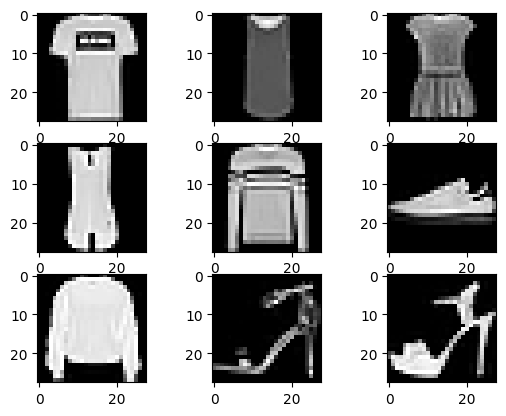

In [4]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()


## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

## 1.5. Обучаем модель

In [6]:
%time
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


his = model.fit(trainX, trainY, batch_size=300, epochs=60, validation_data=(testX, testY))

model.evaluate(testX, testY)


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
Epoch 1/60
200/200 [==============================] - 10s 9ms/step - loss: 1.0669 - accuracy: 0.6804 - val_loss: 0.6179 - val_accuracy: 0.7771
Epoch 2/60
200/200 [==============================] - 1s 7ms/step - loss: 0.5303 - accuracy: 0.8118 - val_loss: 0.5026 - val_accuracy: 0.8192
Epoch 3/60
200/200 [==============================] - 1s 7ms/step - loss: 0.4574 - accuracy: 0.8383 - val_loss: 0.4507 - val_accuracy: 0.8420
Epoch 4/60
200/200 [==============================] - 1s 7ms/step - loss: 0.4204 - accuracy: 0.8520 - val_loss: 0.4283 - val_accuracy: 0.8461
Epoch 5/60
200/200 [==============================] - 1s 7ms/step - loss: 0.3955 - accuracy: 0.8610 - val_loss: 0.4016 - val_accuracy: 0.8582
Epoch 6/60
200/200 [==============================] - 1s 7ms/step - loss: 0.3774 - accuracy: 0.8680 - val_loss: 0.3872 - val_accuracy: 0.8610
Epoch 7/60
200/200 [==============================] - 2s 8ms/step - loss: 0.3634 - 

[0.256606787443161, 0.9085999727249146]

## 1.5. Анализируем обученную модель. Строим график (графики) обучения

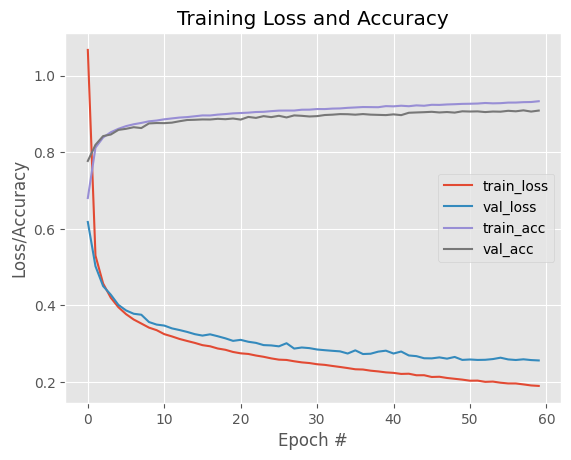

In [9]:
N = np.arange(0, 60)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, his.history["loss"], label="train_loss")
plt.plot(N, his.history["val_loss"], label="val_loss")
plt.plot(N, his.history["accuracy"], label="train_acc")
plt.plot(N, his.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()


## 1.6. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [20]:
import cv2


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


def predict(image):
    image = cv2.bitwise_not(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = image.astype("float") / 255.0
    image = image.reshape(-1, 28, 28, 1)
    preds = model.predict(image)
    i = preds.argmax(axis=1)[0]
    for index, pred in enumerate(preds[0]):
        print(f"{class_names[index]}:{pred * 100:.2f}%", end="; ")
    print()
    text = "{}: {:.2f}%".format(class_names[i], preds[0][i] * 100)
    _ = cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                    (0, 0, 255), 2)
    plt.figure()
    plt.axis('off')
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))


Saving test1.jpg to test1 (2).jpg
1/1 [==============================] - 0s 19ms/step
T-shirt/top:0.07%; Trouser:0.01%; Pullover:0.09%; Dress:0.33%; Coat:1.33%; Sandal:27.97%; Shirt:0.29%; Sneaker:34.19%; Bag:5.54%; Ankle boot:30.19%; 


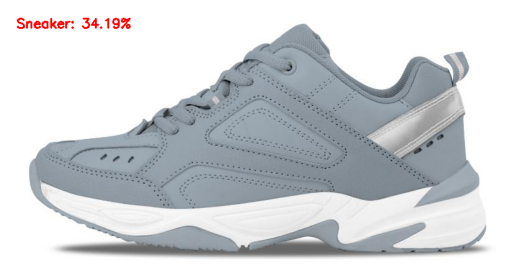

In [21]:
from google.colab import files
uploaded = files.upload() 

image = cv2.imread(list(uploaded.keys())[0])
output = image.copy()
image = cv2.resize(image, (28, 28))

predict(image)


Saving test2.jpg to test2.jpg
1/1 [==============================] - 0s 17ms/step
T-shirt/top:86.59%; Trouser:0.00%; Pullover:0.08%; Dress:0.00%; Coat:0.07%; Sandal:0.00%; Shirt:3.98%; Sneaker:0.01%; Bag:9.26%; Ankle boot:0.00%; 


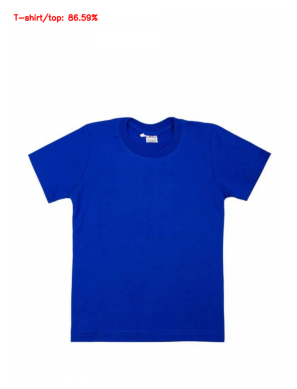

In [13]:
from google.colab import files
uploaded = files.upload() 

image = cv2.imread(list(uploaded.keys())[0])
output = image.copy()
image = cv2.resize(image, (28, 28))

predict(image)

Saving test3.jpg to test3.jpg
1/1 [==============================] - 0s 21ms/step
T-shirt/top:0.45%; Trouser:0.00%; Pullover:0.01%; Dress:99.39%; Coat:0.00%; Sandal:0.00%; Shirt:0.15%; Sneaker:0.00%; Bag:0.00%; Ankle boot:0.00%; 


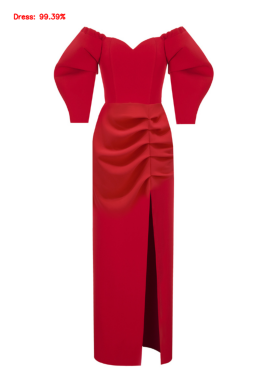

In [14]:
from google.colab import files
uploaded = files.upload() 

image = cv2.imread(list(uploaded.keys())[0])
output = image.copy()
image = cv2.resize(image, (28, 28))

predict(image)

Saving test4.jpg to test4.jpg
1/1 [==============================] - 0s 20ms/step
T-shirt/top:0.03%; Trouser:0.00%; Pullover:1.62%; Dress:0.04%; Coat:0.03%; Sandal:0.00%; Shirt:0.01%; Sneaker:0.00%; Bag:98.27%; Ankle boot:0.00%; 


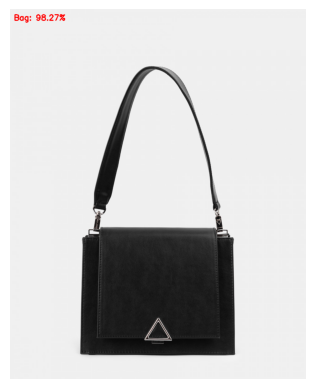

In [15]:
from google.colab import files
uploaded = files.upload() 

image = cv2.imread(list(uploaded.keys())[0])
output = image.copy()
image = cv2.resize(image, (28, 28))

predict(image)

Saving test5.jpg to test5.jpg
1/1 [==============================] - 0s 18ms/step
T-shirt/top:0.00%; Trouser:0.00%; Pullover:0.00%; Dress:0.00%; Coat:0.00%; Sandal:99.97%; Shirt:0.00%; Sneaker:0.01%; Bag:0.03%; Ankle boot:0.00%; 


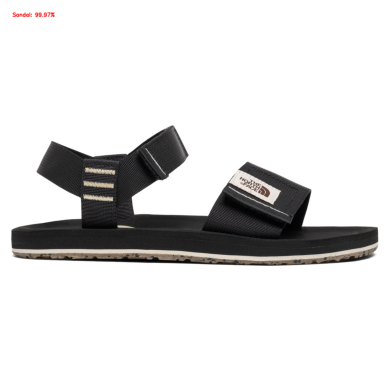

In [16]:
from google.colab import files
uploaded = files.upload() 

image = cv2.imread(list(uploaded.keys())[0])
output = image.copy()
image = cv2.resize(image, (28, 28))

predict(image)